In [49]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import csv
import sys
sys.path.append("..")

from Code.VQLSSVM import VQLSSVM
from Code.Utils import prepareDataset

np.set_printoptions(precision=4, suppress=True)

In [50]:
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 15
classToFilterOut: int = 2

In [51]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="breastCancer",subsetSize=subsetSize, classToFilterOut=classToFilterOut)
print(xTrain)

[[ 0.2068 -0.3162  0.2012 -0.0986 -0.0328  0.0154  0.1326 -0.0318 -0.3202
  -0.2835 -0.5259 -0.8144 -0.6836 -0.6787 -0.5398 -0.2742 -0.6566 -0.2533
  -0.809  -0.5603  0.2344 -0.2767  0.0896 -0.1409  0.3185  0.1026  0.3561
   0.723  -0.5332 -0.0206]
 [-0.3801 -0.9168 -0.3902 -0.6473  0.3807 -0.4766 -0.6777 -0.3483  0.3566
  -0.3071 -0.7837 -0.711  -0.8214 -0.9034 -0.2054 -0.6074 -0.9413 -0.6879
  -0.498  -0.6359 -0.5624 -0.9749 -0.5921 -0.7934 -0.0236 -0.7854 -0.8636
  -0.4909 -0.5486 -0.7787]
 [-0.1671 -0.1072 -0.1444 -0.4578  0.1351 -0.0441 -0.0005 -0.0578  0.0465
  -0.0164 -0.681  -0.6854 -0.7323 -0.8064 -0.525  -0.4366 -0.6995 -0.4734
  -0.8011 -0.6484 -0.1277 -0.0149 -0.2042 -0.4658  0.51   -0.0973  0.1751
   0.3979 -0.3262 -0.0796]
 [-0.6726 -0.6111 -0.6845 -0.8421 -0.049  -0.6452 -0.9689 -0.8791 -0.2646
  -0.3875 -0.9422 -0.7602 -0.9575 -0.9811 -0.6737 -0.9127 -0.9858 -0.8116
  -0.7991 -0.8669 -0.7446 -0.5853 -0.7703 -0.8967 -0.1689 -0.8292 -0.9578
  -0.6932 -0.586  -0.6373]
 [-0

# VQLS-LSSVM state vectors

In [53]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=True, iterations = 200, method="COBYLA")
vqlssvmVectors.plotCost()

Condition number of the matrix:  3011.3852421141232
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.
    1.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     105.2993   3.8203   4.6593   4.5084   3.816    3.5294   5.1439
    5.0955   4.3462   4.9269   4.4901   4.1531   4.6718   4.5894   4.7327]
 [  1.       3.8203 112.5224   5.6841  13.7819   9.8722   8.6937   6.5622
    4.3327  10.5649  11.9136   8.9747  11.9245   4.6386   9.9499   7.5501]
 [  1.       4.6593   5.6841 105.5041   6.8843   5.7888   4.6382   6.8713
    4.1727   6.0743   6.8313   5.1905   6.277    4.9419   6.8881   4.4222]
 [  1.       4.5084  13.7819   6.8843 117.1645  13.8481  10.0249   8.2388
    4.7811  13.0576  14.9882  10.9682  15.0276   6.1702  12.6203   8.2796]
 [  1.       3.816    9.8722   5.7888  13.8481 113.995    7.4294   6.1172
    4.7653  10.7698  11.7591   9.6083  12.1456   5.812   10.9242   6.5814]
 [  1.       3.5294   8.6937   4.6382  10.

In [ ]:
print(vqlssvmVectors.predict(xTest))

[ 0.06  +0.j -0.0745+0.j -0.0547+0.j -0.1131+0.j -0.0373+0.j -0.0761+0.j
 -0.0572+0.j  0.0571+0.j -0.0332+0.j -0.0287+0.j  0.0505+0.j -0.0598+0.j
  0.0356+0.j -0.0476+0.j -0.0774+0.j  0.0191+0.j  0.047 +0.j  0.0389+0.j
 -0.0335+0.j -0.0971+0.j -0.0416+0.j  0.0547+0.j  0.0499+0.j  0.0356+0.j
  0.0807+0.j  0.0543+0.j -0.0428+0.j  0.0318+0.j  0.0491+0.j -0.0792+0.j
 -0.0174+0.j  0.0473+0.j  0.0463+0.j -0.0355+0.j -0.0839+0.j  0.0663+0.j
  0.0615+0.j -0.0415+0.j -0.061 +0.j -0.0361+0.j -0.0727+0.j  0.033 +0.j
  0.0625+0.j -0.0767+0.j  0.0277+0.j  0.0264+0.j  0.0585+0.j  0.0306+0.j
  0.0378+0.j  0.0403+0.j  0.042 +0.j -0.0663+0.j -0.0427+0.j  0.0439+0.j
  0.0762+0.j  0.0574+0.j  0.0463+0.j -0.0339+0.j  0.0822+0.j  0.0717+0.j
 -0.0617+0.j -0.0349+0.j -0.1098+0.j -0.0294+0.j -0.0854+0.j -0.0511+0.j
  0.0369+0.j -0.0301+0.j  0.0494+0.j  0.0661+0.j  0.0573+0.j -0.1078+0.j
 -0.0603+0.j  0.0431+0.j  0.0276+0.j  0.0639+0.j -0.0608+0.j -0.0242+0.j
  0.037 +0.j  0.0126+0.j -0.0519+0.j  0.0315+0.j -0

In [ ]:
print("Accuracy:",vqlssvmVectors.accuracy(xTest, yTest))

Accuracy: 1.0


# VQLS-LSSVM quantum

Condition number of the matrix:  1597.4885322547573
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     100.6065  -0.9936  -0.7341   0.7206  -0.9257  -0.9182  -0.9391]
 [  1.      -0.9936 101.6948   1.2645  -1.146    1.5655   1.5419   1.6248]
 [  1.      -0.7341   1.2645 101.0524  -0.872    1.2361   1.1957   1.3444]
 [  1.       0.7206  -1.146   -0.872  100.9125  -1.1856  -1.0357  -1.2107]
 [  1.      -0.9257   1.5655   1.2361  -1.1856 101.774    1.3051   1.8947]
 [  1.      -0.9182   1.5419   1.1957  -1.0357   1.3051 101.522    1.3535]
 [  1.      -0.9391   1.6248   1.3444  -1.2107   1.8947   1.3535 102.072 ]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(88.70429467711398+0j), (0.6081201544788775+0j),

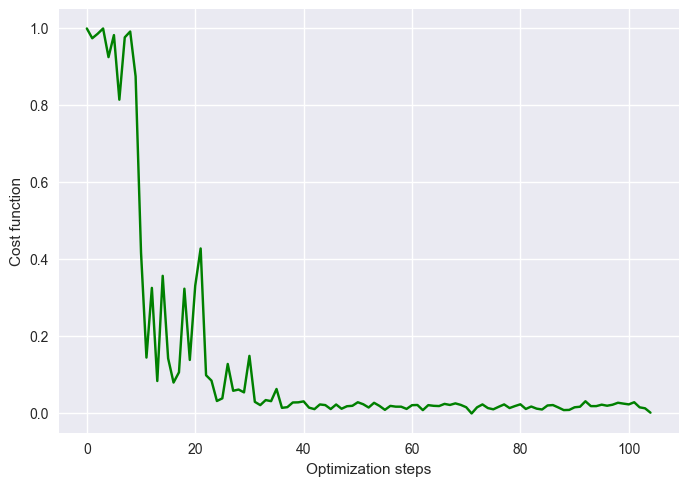

In [ ]:
vqlssvmQuantum: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmQuantum.train(xTrain, yTrain, quantumSimulation=True, verbose=True, iterations = 200)

vqlssvmQuantum.plotCost()

In [ ]:
costCOBYLA = vqlssvmQuantum.getCostHistory()

with open('../SimulationResults/costCOBYLA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration', 'CostFunction'])
    for i in range(len(costCOBYLA)):
        writer.writerow([i, costCOBYLA[i]])


In [ ]:
print("Predictions:\n", vqlssvmQuantum.predict(xTest))
print("Accuracy: ", vqlssvmQuantum.accuracy(xTest, yTest))

Predictions:
 [ 0.007 +0.j  0.0284+0.j  0.0647+0.j -0.0604+0.j  0.027 +0.j  0.0401+0.j
 -0.0615+0.j  0.0218+0.j  0.0533+0.j -0.0684+0.j -0.0688+0.j  0.0475+0.j
  0.021 +0.j  0.0548+0.j  0.0467+0.j -0.0682+0.j  0.0472+0.j  0.0642+0.j
 -0.0685+0.j  0.0367+0.j -0.0701+0.j -0.0639+0.j  0.057 +0.j -0.0577+0.j
  0.0176+0.j -0.0683+0.j -0.0542+0.j  0.0228+0.j  0.0088+0.j -0.0669+0.j
 -0.0834+0.j  0.054 +0.j -0.0493+0.j  0.0334+0.j  0.035 +0.j  0.0354+0.j
 -0.0758+0.j -0.0656+0.j  0.0555+0.j -0.0674+0.j  0.0391+0.j  0.0457+0.j
 -0.0645+0.j -0.0586+0.j  0.0681+0.j  0.05  +0.j  0.0448+0.j  0.0396+0.j
  0.0606+0.j  0.0379+0.j  0.0489+0.j -0.0559+0.j  0.045 +0.j  0.0324+0.j
  0.0328+0.j  0.061 +0.j -0.0761+0.j -0.0644+0.j  0.0296+0.j -0.0649+0.j
 -0.0666+0.j  0.066 +0.j  0.0488+0.j  0.0381+0.j -0.0501+0.j  0.0276+0.j
 -0.0595+0.j -0.0694+0.j -0.0724+0.j  0.0274+0.j -0.0686+0.j -0.074 +0.j
  0.0273+0.j -0.0653+0.j -0.0602+0.j -0.0655+0.j -0.0659+0.j -0.0647+0.j
 -0.0784+0.j  0.0285+0.j -0.0582+0.j 

# LSSVM (work in progresss)

In [ ]:
# lssvmMatrix1: np.ndarray = lssvmMatrix(xTrain, gamma, "linearKernel")
# yVector: np.array = prepareLabels(yTrain)
# print(yVector)
# print ("Condition number of the matrix: ", np.linalg.cond(lssvmMatrix1))
# print("LS-SVM Matrix:\n", lssvmMatrix1)
# print(yVector)

# solution: np.array = np.linalg.solve(lssvmMatrix1, yVector)
# print("Solution:", solution)
# print ("Norm of the solution: ",solution/np.linalg.norm(solution))

# bias: float = solution[0]
# weights: np.array = solution[1:]

# vqlssvmLSSVM: VQLSSVM = VQLSSVM(gamma,10)
# vqlssvmLSSVM.xTrain = xTrain
# vqlssvmLSSVM.xTrainSize = xTrain.shape[0]
# vqlssvmLSSVM.weights = weights
# vqlssvmLSSVM.b = bias
# predictions: np.array = vqlssvmLSSVM.predict(xTest)
# classVals = [vqlssvmLSSVM.assignClass(i) for i in predictions]
# print("Predictions:", predictions)
# print("Class values:", classVals)
# print("yTest:", yTest)
# # print(yTest)
# print("Accuracy:", vqlssvmLSSVM.accuracy(xTest, yTest))

# Classical SVM

In [ ]:
clf = SVC(kernel='linear')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Accuracy:", accuracy_score(yTest, yPred))

Accuracy: 0.9314079422382672
